# Sistemas de 1° Orden

#### Index
1. <a href="#introduccion">Introducción</a>
2. <a href="#respuesta-escalon-unitario">Respuesta al escalón unitario</a>
    1. <a href="#parametro-k">Parámetro K: ganancia estática del sistema</a>
    2. <a href="#parametro-t">Parámetro T: constante de tiempo</a>
    3. <a href="#tiempo-establecimiento">Parámetro ts: tiempo de establecimiento</a>
    4. <a href="#tiempo-pico">Parámetro Tp: tiempo pico</a>
3. <a href="#3.-Ejercicios">Ejercicios</a>
    - <a href="#Ejercicio-1">Ejercicio 1</a>

In [1]:
import lcapy as lp # libreria para análisis de circuitos
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

__Nota__: utilizaremos la librería `lcapy` para realizar los diagramas en bloque. Más información en su documentación: <a href="https://lcapy.readthedocs.io/en/latest/schematics.html#block-diagrams">Block diagrams</a>

## 1. <span id="introduccion">Introducción</span>

Partiendo de la expresión general:
$$G(s) = \frac{C(s)}{R(s)} = \frac{b_m s^m + ... + b_1 s + b_0}{s^n + a_{n-1} s^{n-1} + ... + a_1 s + a_0}$$

La mínima expresión es:
$$G(s) = \frac{C(s)}{R(s)} = \frac{b_0}{a_1 s + a_0}$$

Renombramos los términos para relacionarlos a sistemas:
$$G(s) = \frac{C(s)}{R(s)} = \frac{K}{T s + 1}$$

El sistema queda:

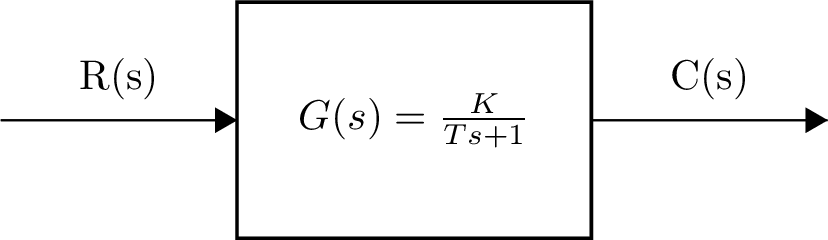

In [2]:
cct = lp.Circuit()
cct.add("""
    W 1 2; endarrow=tri, l=R(s)
    TR1 2 3; right=1.5, l=${G(s)=\\frac{K}{Ts + 1}}$
    W 3 4; endarrow=tri, right, l=C(s)
    ; draw_nodes=false, label_nodes=false
""")
cct.draw()

## 2. <span id="respuesta-escalon-unitario">Respuesta al escalón unitario</span>

Recordando que la transformada del escalón unitario $u(t)$ es $\frac{1}{s}$, tenemos que:
$$R(s) = \frac{1}{s} \rightarrow C(s) = \frac{K}{Ts + 1} \cdot \frac{1}{s}$$

En el dominio del tiempo:
$$c(t) = K \cdot (1 - e^{-\frac{t}{T}})$$

In [3]:
# función escalón genérica
def u(x, x0):
    return np.heaviside(x - x0, 1)

# Para versiones actualizadas vease el archivo "functions.py"
# función genérica para graficar respuesta al escalón
def plot_step_response(sys, t=None, show=True):
    t, y = ctrl.step_response(sys, t)
    plt.plot(t, y)
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.title('Step Response')
    plt.grid()
    if show:
        plt.show()

# función genérica para graficar información sobre la respuesta al escalón
#idx = (np.abs(y - 0.95*K)).argmin()
def plot_step_response_info(info, show=True):
    K = info['Peak']
    Tp = info['PeakTime']
    ts = info['SettlingTime']
    plt.plot(Tp, K, 'b*', label='(Tp, K)')
    plt.axvline(x=ts, color='r', linestyle='--', label='ts')
    plt.axhline(y=0.632*K, color='k', linestyle='--', label='63,2%')

    tau = ts/3.97689
    plt.axvline(x=tau, color='g', linestyle='--', label='$T$')
    
    plt.legend()
    if show:
        plt.show()

    return K, Tp, ts, tau


  1
-----
s + 1



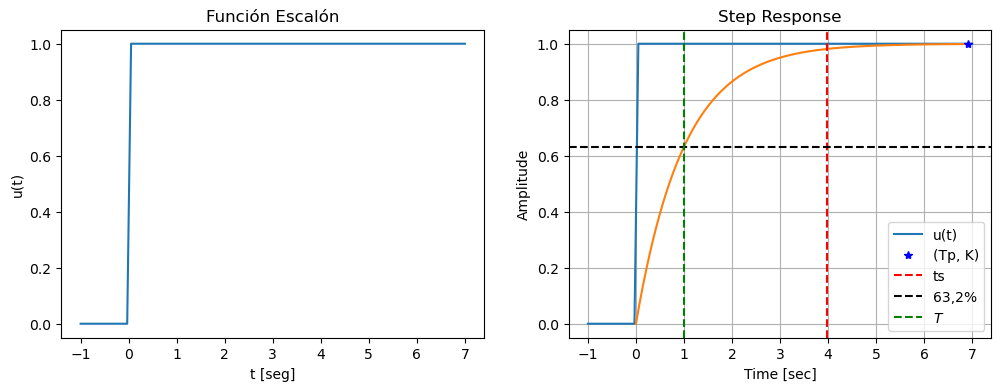

In [4]:
t = np.linspace(-1, 7, 100)

plt.figure(figsize=(12, 4))

# Plot: función escalón
plt.subplot(121)
plt.plot(t, u(t, 0))
plt.title('Función Escalón')
plt.xlabel('t [seg]')
plt.ylabel('u(t)')

plt.subplot(122)
# definimos el sistema
G = ctrl.tf([1], [1, 1])
print(G)

plt.plot(t, u(t, 0), label="u(t)")
plot_step_response(G, show=False)
plot_step_response_info(ctrl.step_info(G))

__Nota__: Utilizamos como recurso para obtener información, la función `step_info` disponible en la librería de control. La información que retorna es la siguiente:
<ul>
    <li><b>RiseTime (tr):</b>
            Time from 10% to 90% of the steady-state value.
    </li>
    <li><b>SettlingTime (ts):</b>
            Time to enter inside a default error of 2%
    <li><b>SettlingMin:</b>
            Minimum value after RiseTime
    </li>
    <li><b>SettlingMax:</b>
            Maximum value after RiseTime
    </li>
    <li><b>Overshoot:</b>
            Percentage of the Peak relative to steady value
    </li>
    <li><b>Undershoot:</b>
            Percentage of undershoot
    </li>
    <li><b>Peak (Mp):</b>
            Absolute peak value
    </li>
    <li><b>PeakTime (Tp):</b>
            time of the Peak
    </li>
    <li><b>SteadyStateValue:</b>
            Steady-state value
    </li>
</ul>


### 2.A. <span id="parametro-k">Parámetro K: ganancia estática del sistema</span>
El parámetro K, es el valor final que tendrá el sistema cuando $s \rightarrow 0$, o también, cuando $t \rightarrow \infty$.

Con la función `step_info`, podemos obtener su valor directamente, cuando retorna: _Peak_

Proponemos dos funciones de transferencias ($K < 1$ y $K > 1$):

$$G(s)_1 = \frac{0.1}{1s + 1}$$

$$G(s)_2 = \frac{10}{1s + 1}$$

G1(s) = 
 0.1
-----
s + 1

K1 = 0.1

G2(s) = 
 10
-----
s + 1

K2 = 9.99


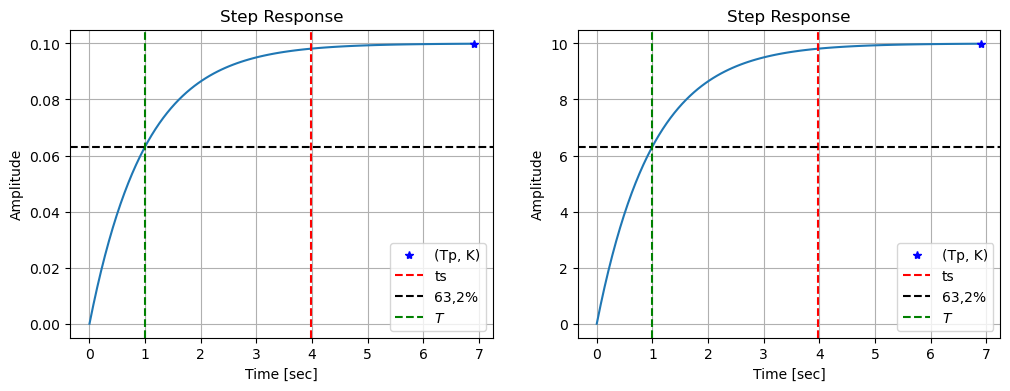

In [5]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
# Gs1
G1 = ctrl.tf([0.1], [1, 1])
print("G1(s) =", G1)

plot_step_response(G1, show=False)
K1 = plot_step_response_info(ctrl.step_info(G1), show=False)[0] # solo queremos el de K

print("K1 =", round(K1, 2))

plt.subplot(122)
# Gs2
G2 = ctrl.tf([10], [1, 1])
print("\nG2(s) =", G2)

plot_step_response(G2, show=False)
K2 = plot_step_response_info(ctrl.step_info(G2), show=False)[0] # solo queremos el de K

print("K2 =", round(K2, 2))

plt.show()

### _Conclusiones_

### 2.B. <span id="parametro-t">Parámetro T: constante de tiempo</span>

Proponemos dos funciones de transferencias ($T < 1$ y $T > 1$):

$$G(s)_1 = \frac{1}{0.1s + 1}$$

$$G(s)_2 = \frac{1}{10s + 1}$$

G1(s) = 
    1
---------
0.1 s + 1

Tp = 0.69
ts = 0.4
T = 0.1

G2(s) = 
   1
--------
10 s + 1



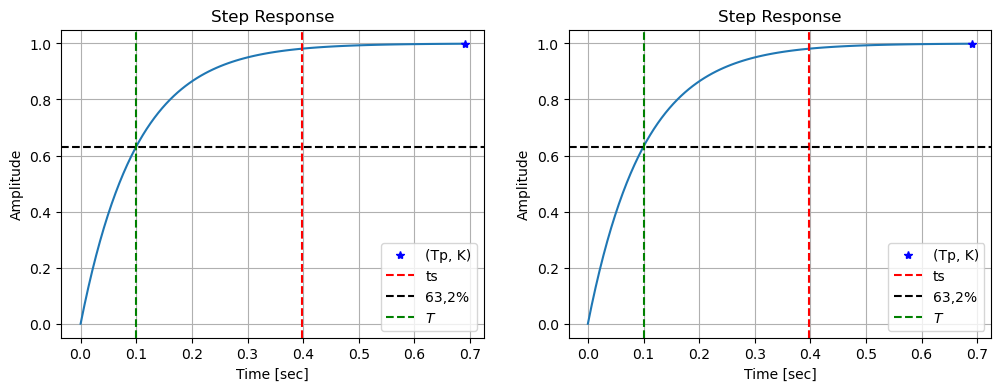

Tp = 0.69
ts = 0.4
T = 0.1


In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
# Gs1
G1 = ctrl.tf([1], [0.1, 1])
print("G1(s) =", G1)

plot_step_response(G1, show=False)
_, Tp, ts, tau = plot_step_response_info(ctrl.step_info(G1), show=False)

print("Tp =", round(Tp, 2))
print("ts =", round(ts, 2))
print("T =", round(tau, 2))

plt.subplot(122)
# Gs2
G2 = ctrl.tf([1], [10, 1])
print("\nG2(s) =", G2)

plot_step_response(G1, show=False)
_, Tp, ts, tau = plot_step_response_info(ctrl.step_info(G1))

print("Tp =", round(Tp, 2))
print("ts =", round(ts, 2))
print("T =", round(tau, 2))

### _Conclusiones_

### 2.C. <span id="tiempo-establecimiento">Parámetro ts: tiempo de establecimiento</span>

### 2.D. <span id="tiempo-pico">Parámetro Tp: tiempo pico</span>

## 3. Ejercicios
### Ejercicio 1
Aplicando una entrada del tipo escalón unitario encuentre para el siguiente sistema:

$$G(s) = \frac{Y(s)}{U(s)} = \frac{3}{4s+2}$$

- La constante de tiempo y el tiempo de establecimiento
- Valor de la salida en estado estable
- La expresión de $y(t)$ y su gráfica

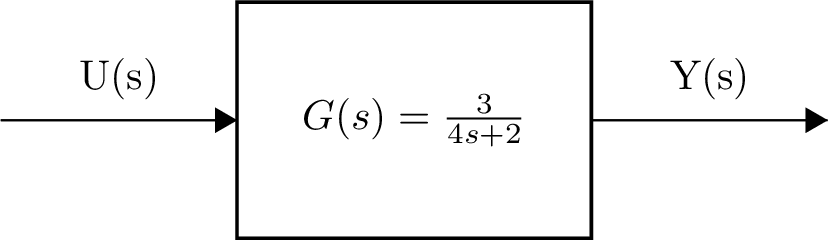

In [7]:
cct = lp.Circuit()
cct.add("""
    W 1 2; endarrow=tri, l=U(s)
    TR1 2 3; right=1.5, l=${G(s)=\\frac{3}{4s + 2}}$
    W 3 4; endarrow=tri, right, l=Y(s)
    ; draw_nodes=false, label_nodes=false
""")
cct.draw()


   3
-------
4 s + 2



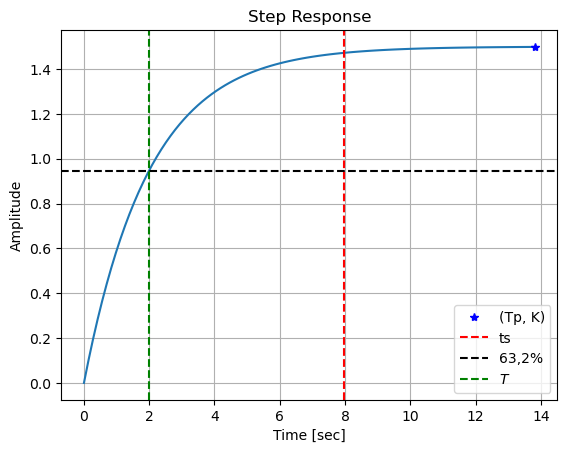

K = 1.5
Tp = 13.82 segundos
ts = 7.95 segundos
T = 2.0 segundos


In [8]:
G = ctrl.tf([3], [4, 2])
print(G)

plot_step_response(G, show=False)
K, Tp, ts, tau = plot_step_response_info( ctrl.step_info(G) )

# Imprimimos los valores
print("K =", round(K, 2))
print("Tp =", round(Tp, 2), "segundos")
print("ts =", round(ts, 2), "segundos")
print("T =", round(tau, 2), "segundos")